**General information:**

- This project is done by me, Huynh Tan Loc, under the guidance of Mr. Nguyen Thanh Tuan and teaching assistant Nguyen Thanh Trung.
- Hotel is one of the hottest topics in the tourism industry, so there are a lot hotels with different qualities. For these reasons, understanding customers psychology is essential. Using information technology, especially Machine learning, in analyzing customer feedback data will help hotels improve business efficiency. So I decided to choose the topic "Europe Hotel Booking Satisfaction Score" to do this project.
- This project referenced "Europe Hotel Booking Satisfaction Score dataset" from Kaggle: https://www.kaggle.com/ishansingh88/europe-hotel-satisfaction-score

#**1. MOUNT DRIVE AND IMPORT LIBRARY**

In [ ]:
# Mount drive
%cd /content/drive/MyDrive/dataset_project_final
!ls

/content/drive/MyDrive/dataset_project_final
'Europe Hotel Booking Satisfaction Score.csv'


In [ ]:
# Import Library
import numpy
import copy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from collections import Counter
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#**2. DATA LOADING AND OVERVIEW**

In [ ]:
dataFrame = read_csv('Europe Hotel Booking Satisfaction Score.csv')

In [ ]:
dataFrame.shape

(103904, 17)

**There are 103904 sample in dataset, so i think this is enough to train and test models**

In [ ]:
dataFrame.head()

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,1,Male,48,tourism,Group Travel,Group bookings,3,3,3,3,5,5,5,4,5,5,neutral or dissatisfied
1,2,Female,35,tourism,Group Travel,Group bookings,2,2,2,2,3,4,5,3,5,5,satisfied
2,3,Male,41,tourism,Group Travel,Group bookings,4,4,4,4,5,5,3,4,3,5,satisfied
3,4,Male,50,tourism,Group Travel,Group bookings,2,2,2,2,4,5,5,3,5,4,satisfied
4,5,Female,49,business,Group Travel,Group bookings,3,3,3,3,4,4,3,3,3,5,satisfied


In [ ]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   id                              103904 non-null  int64 
 1   Gender                          103904 non-null  object
 2   Age                             103904 non-null  int64 
 3   purpose_of_travel               103904 non-null  object
 4   Type of Travel                  103904 non-null  object
 5   Type Of Booking                 103904 non-null  object
 6   Hotel wifi service              103904 non-null  int64 
 7   Departure/Arrival  convenience  103904 non-null  int64 
 8   Ease of Online booking          103904 non-null  int64 
 9   Hotel location                  103904 non-null  int64 
 10  Food and drink                  103904 non-null  int64 
 11  Stay comfort                    103904 non-null  int64 
 12  Common Room entertainment     

In [ ]:
dataFrame.describe()

,id,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,64924.210502,39.379706,2.729683,3.060296,2.756901,2.976883,3.202129,3.439396,3.358158,3.304290,3.640428,3.286351
std,37463.812252,15.114964,1.327829,1.525075,1.398929,1.277621,1.329533,1.319088,1.332991,1.265396,1.175663,1.312273
min,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000
50%,64856.500000,40.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,97368.250000,51.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000
max,129880.000000,85.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


**I think id column won't effect to results, so i will delete it!!!**

In [ ]:
dataFrame = dataFrame.drop(['id'], axis=1)
dataFrame.head()

,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,Male,48,tourism,Group Travel,Group bookings,3,3,3,3,5,5,5,4,5,5,neutral or dissatisfied
1,Female,35,tourism,Group Travel,Group bookings,2,2,2,2,3,4,5,3,5,5,satisfied
2,Male,41,tourism,Group Travel,Group bookings,4,4,4,4,5,5,3,4,3,5,satisfied
3,Male,50,tourism,Group Travel,Group bookings,2,2,2,2,4,5,5,3,5,4,satisfied
4,Female,49,business,Group Travel,Group bookings,3,3,3,3,4,4,3,3,3,5,satisfied


**Now, i will process all features in dataset to find the correlation of them with outcome!!!**

**2.1. GENDER**

In [ ]:
list_of_gender = list(dataFrame['Gender'].apply(lambda x: "Male" if x == "Male" else "Female"))
Counter([i for i in list_of_gender]).most_common()

[('Female', 52727), ('Male', 51177)]

**The number of Females is approximate the number of Males!**

In [ ]:
list_of_Male = list(dataFrame['satisfaction'].apply(lambda x: "satisfied" if x == "satisfied" else "neutral or dissatisfied"))
Counter([i for i in list_of_Male]).most_common()

[('neutral or dissatisfied', 58879), ('satisfied', 45025)]

**The number of 'neutral or dissatisfied' is slightly more than the number of 'satisfied'!**

In [ ]:
# Find the number of male - satisfied 
dataFrame_male_satisfied = dataFrame[dataFrame.Gender == 'Male']
num_male_satisfied = len(dataFrame_male_satisfied[dataFrame_male_satisfied.satisfaction == 'satisfied'])
# Find the number of female - satisfied 
dataFrame_female_satisfied = dataFrame[dataFrame.Gender == 'Female']
num_female_satisfied = len(dataFrame_female_satisfied[dataFrame_female_satisfied.satisfaction == 'satisfied'])
# Find the number of male - neutral or dissatisfied
dataFrame_male_neutral = dataFrame[dataFrame.Gender == 'Male']
num_male_neutral = len(dataFrame_male_neutral[dataFrame_male_neutral.satisfaction == 'neutral or dissatisfied'])
# Find the number of female - neutral or dissatisfied
dataFrame_female_neutral = dataFrame[dataFrame.Gender == 'Female']
num_female_neutral = len(dataFrame_female_satisfied[dataFrame_female_neutral.satisfaction == 'neutral or dissatisfied'])

In [ ]:
print("Male - satisfied:", num_male_satisfied)
print("Female - satisfied:", num_female_satisfied)
print("Male - neutral or dissatisfied:", num_male_neutral)
print("Female - neutral or dissatisfied:", num_female_neutral)

Male - satisfied: 22491
Female - satisfied: 22534
Male - neutral or dissatisfied: 28686
Female - neutral or dissatisfied: 30193


**I will seperate Gender column to 2 columns: Male and Female**

**If Gender is Male, value of Male column is 1, value of Female column is 0**

**If Gender is Female, value of Male column is 0, value of Female column is 1** 

In [ ]:
dataFrame["Male"] = dataFrame["Gender"].apply(lambda x: 1 if x == "Male" else 0)
dataFrame["Female"] = dataFrame["Gender"].apply(lambda x: 1 if x == "Female" else 0)
dataFrame = dataFrame.drop(["Gender"], axis = 1)
dataFrame

,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction,Male,Female
0,48,tourism,Group Travel,Group bookings,3,3,3,3,5,5,5,4,5,5,neutral or dissatisfied,1,0
1,35,tourism,Group Travel,Group bookings,2,2,2,2,3,4,5,3,5,5,satisfied,0,1
2,41,tourism,Group Travel,Group bookings,4,4,4,4,5,5,3,4,3,5,satisfied,1,0
3,50,tourism,Group Travel,Group bookings,2,2,2,2,4,5,5,3,5,4,satisfied,1,0
4,49,business,Group Travel,Group bookings,3,3,3,3,4,4,3,3,3,5,satisfied,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,28,personal,Personal Travel,Not defined,4,2,4,4,3,3,3,4,4,3,neutral or dissatisfied,0,1
103900,55,aviation,Personal Travel,Not defined,3,4,3,4,2,3,4,4,4,4,neutral or dissatisfied,0,1
103901,42,academic,Personal Travel,Not defined,2,5,2,1,3,3,3,4,4,3,neutral or dissatisfied,1,0
103902,50,business,Personal Travel,Not defined,5,4,4,1,3,4,3,3,4,3,satisfied,1,0


**2.2. AGE**

**This feature will be processed and visualized in the following section**

**2.3. PURPOSE_OF_TRAVEL**

In [ ]:
list_of_purpose = list(dataFrame['purpose_of_travel'].apply(lambda x: x if x != {} else []))
list_num_purpose = Counter([i for i in list_of_purpose]).most_common()
list_num_purpose

[('tourism', 32053),
 ('academic', 27219),
 ('business', 21238),
 ('aviation', 13846),
 ('personal', 9548)]

**I will seperate purpose_of_travel column to a lot columns with name of new column is 1 of 4 purposes, value is 0 or 1 as same as i did in Gender column**

In [ ]:
for s in dict(list_num_purpose).keys():
  dataFrame[s] = dataFrame["purpose_of_travel"].apply(lambda x: 1 if x == s else 0)
dataFrame = dataFrame.drop(["purpose_of_travel"], axis = 1)
dataFrame

,Age,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction,Male,Female,tourism,academic,business,aviation,personal
0,48,Group Travel,Group bookings,3,3,3,3,5,5,5,4,5,5,neutral or dissatisfied,1,0,1,0,0,0,0
1,35,Group Travel,Group bookings,2,2,2,2,3,4,5,3,5,5,satisfied,0,1,1,0,0,0,0
2,41,Group Travel,Group bookings,4,4,4,4,5,5,3,4,3,5,satisfied,1,0,1,0,0,0,0
3,50,Group Travel,Group bookings,2,2,2,2,4,5,5,3,5,4,satisfied,1,0,1,0,0,0,0
4,49,Group Travel,Group bookings,3,3,3,3,4,4,3,3,3,5,satisfied,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,28,Personal Travel,Not defined,4,2,4,4,3,3,3,4,4,3,neutral or dissatisfied,0,1,0,0,0,0,1
103900,55,Personal Travel,Not defined,3,4,3,4,2,3,4,4,4,4,neutral or dissatisfied,0,1,0,0,0,1,0
103901,42,Personal Travel,Not defined,2,5,2,1,3,3,3,4,4,3,neutral or dissatisfied,1,0,0,1,0,0,0
103902,50,Personal Travel,Not defined,5,4,4,1,3,4,3,3,4,3,satisfied,1,0,0,0,1,0,0


**2.4. TYPE OF TRAVEL**

In [ ]:
list_of_typeTravel = list(dataFrame['Type of Travel'].apply(lambda x: x if x != {} else []))
list_num_typeTravel = Counter([i for i in list_of_typeTravel]).most_common()
list_num_typeTravel

[('Group Travel', 71655), ('Personal Travel', 32249)]

In [ ]:
for s in dict(list_num_typeTravel).keys():
  dataFrame[s] = dataFrame["Type of Travel"].apply(lambda x: 1 if x == s else 0)
dataFrame = dataFrame.drop(["Type of Travel"], axis = 1)
dataFrame

,Age,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction,Male,Female,tourism,academic,business,aviation,personal,Group Travel,Personal Travel
0,48,Group bookings,3,3,3,3,5,5,5,4,5,5,neutral or dissatisfied,1,0,1,0,0,0,0,1,0
1,35,Group bookings,2,2,2,2,3,4,5,3,5,5,satisfied,0,1,1,0,0,0,0,1,0
2,41,Group bookings,4,4,4,4,5,5,3,4,3,5,satisfied,1,0,1,0,0,0,0,1,0
3,50,Group bookings,2,2,2,2,4,5,5,3,5,4,satisfied,1,0,1,0,0,0,0,1,0
4,49,Group bookings,3,3,3,3,4,4,3,3,3,5,satisfied,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,28,Not defined,4,2,4,4,3,3,3,4,4,3,neutral or dissatisfied,0,1,0,0,0,0,1,0,1
103900,55,Not defined,3,4,3,4,2,3,4,4,4,4,neutral or dissatisfied,0,1,0,0,0,1,0,0,1
103901,42,Not defined,2,5,2,1,3,3,3,4,4,3,neutral or dissatisfied,1,0,0,1,0,0,0,0,1
103902,50,Not defined,5,4,4,1,3,4,3,3,4,3,satisfied,1,0,0,0,1,0,0,0,1


**2.5. TYPE OF BOOKING**

In [ ]:
list_of_typeBooking = list(dataFrame['Type Of Booking'].apply(lambda x: x if x != {} else []))
list_num_typeBooking = Counter([i for i in list_of_typeBooking]).most_common()
list_num_typeBooking

[('Group bookings', 49665),
 ('Individual/Couple', 46745),
 ('Not defined', 7494)]

In [ ]:
for s in dict(list_num_typeBooking).keys():
  dataFrame[s] = dataFrame['Type Of Booking'].apply(lambda x: 1 if x == s else 0)
dataFrame = dataFrame.drop(['Type Of Booking'], axis = 1)
dataFrame

,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction,Male,Female,tourism,academic,business,aviation,personal,Group Travel,Personal Travel,Group bookings,Individual/Couple,Not defined
0,48,3,3,3,3,5,5,5,4,5,5,neutral or dissatisfied,1,0,1,0,0,0,0,1,0,1,0,0
1,35,2,2,2,2,3,4,5,3,5,5,satisfied,0,1,1,0,0,0,0,1,0,1,0,0
2,41,4,4,4,4,5,5,3,4,3,5,satisfied,1,0,1,0,0,0,0,1,0,1,0,0
3,50,2,2,2,2,4,5,5,3,5,4,satisfied,1,0,1,0,0,0,0,1,0,1,0,0
4,49,3,3,3,3,4,4,3,3,3,5,satisfied,0,1,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,28,4,2,4,4,3,3,3,4,4,3,neutral or dissatisfied,0,1,0,0,0,0,1,0,1,0,0,1
103900,55,3,4,3,4,2,3,4,4,4,4,neutral or dissatisfied,0,1,0,0,0,1,0,0,1,0,0,1
103901,42,2,5,2,1,3,3,3,4,4,3,neutral or dissatisfied,1,0,0,1,0,0,0,0,1,0,0,1
103902,50,5,4,4,1,3,4,3,3,4,3,satisfied,1,0,0,0,1,0,0,0,1,0,0,1


**2.6. SATISFACTION**

**I will convert the value of satisfaction from string to 0, 1**

**1 if satisfaction is satisfied**

**0 if satisfaction is neutral or dissatisfied**

In [ ]:
dataFrame["satisfaction"] = dataFrame["satisfaction"].apply(lambda x: 1 if x == "satisfied" else 0)
dataFrame

,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction,Male,Female,tourism,academic,business,aviation,personal,Group Travel,Personal Travel,Group bookings,Individual/Couple,Not defined
0,48,3,3,3,3,5,5,5,4,5,5,0,1,0,1,0,0,0,0,1,0,1,0,0
1,35,2,2,2,2,3,4,5,3,5,5,1,0,1,1,0,0,0,0,1,0,1,0,0
2,41,4,4,4,4,5,5,3,4,3,5,1,1,0,1,0,0,0,0,1,0,1,0,0
3,50,2,2,2,2,4,5,5,3,5,4,1,1,0,1,0,0,0,0,1,0,1,0,0
4,49,3,3,3,3,4,4,3,3,3,5,1,0,1,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,28,4,2,4,4,3,3,3,4,4,3,0,0,1,0,0,0,0,1,0,1,0,0,1
103900,55,3,4,3,4,2,3,4,4,4,4,0,0,1,0,0,0,1,0,0,1,0,0,1
103901,42,2,5,2,1,3,3,3,4,4,3,0,1,0,0,1,0,0,0,0,1,0,0,1
103902,50,5,4,4,1,3,4,3,3,4,3,1,1,0,0,0,1,0,0,0,1,0,0,1


#**3. DATA EXPLORATION**

**Currently, i have a dataFrame with all numbers. So the data will be easier to process**

In [ ]:
dataFrame

,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction,Male,Female,tourism,academic,business,aviation,personal,Group Travel,Personal Travel,Group bookings,Individual/Couple,Not defined
0,48,3,3,3,3,5,5,5,4,5,5,0,1,0,1,0,0,0,0,1,0,1,0,0
1,35,2,2,2,2,3,4,5,3,5,5,1,0,1,1,0,0,0,0,1,0,1,0,0
2,41,4,4,4,4,5,5,3,4,3,5,1,1,0,1,0,0,0,0,1,0,1,0,0
3,50,2,2,2,2,4,5,5,3,5,4,1,1,0,1,0,0,0,0,1,0,1,0,0
4,49,3,3,3,3,4,4,3,3,3,5,1,0,1,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,28,4,2,4,4,3,3,3,4,4,3,0,0,1,0,0,0,0,1,0,1,0,0,1
103900,55,3,4,3,4,2,3,4,4,4,4,0,0,1,0,0,0,1,0,0,1,0,0,1
103901,42,2,5,2,1,3,3,3,4,4,3,0,1,0,0,1,0,0,0,0,1,0,0,1
103902,50,5,4,4,1,3,4,3,3,4,3,1,1,0,0,0,1,0,0,0,1,0,0,1


<function matplotlib.pyplot.show>

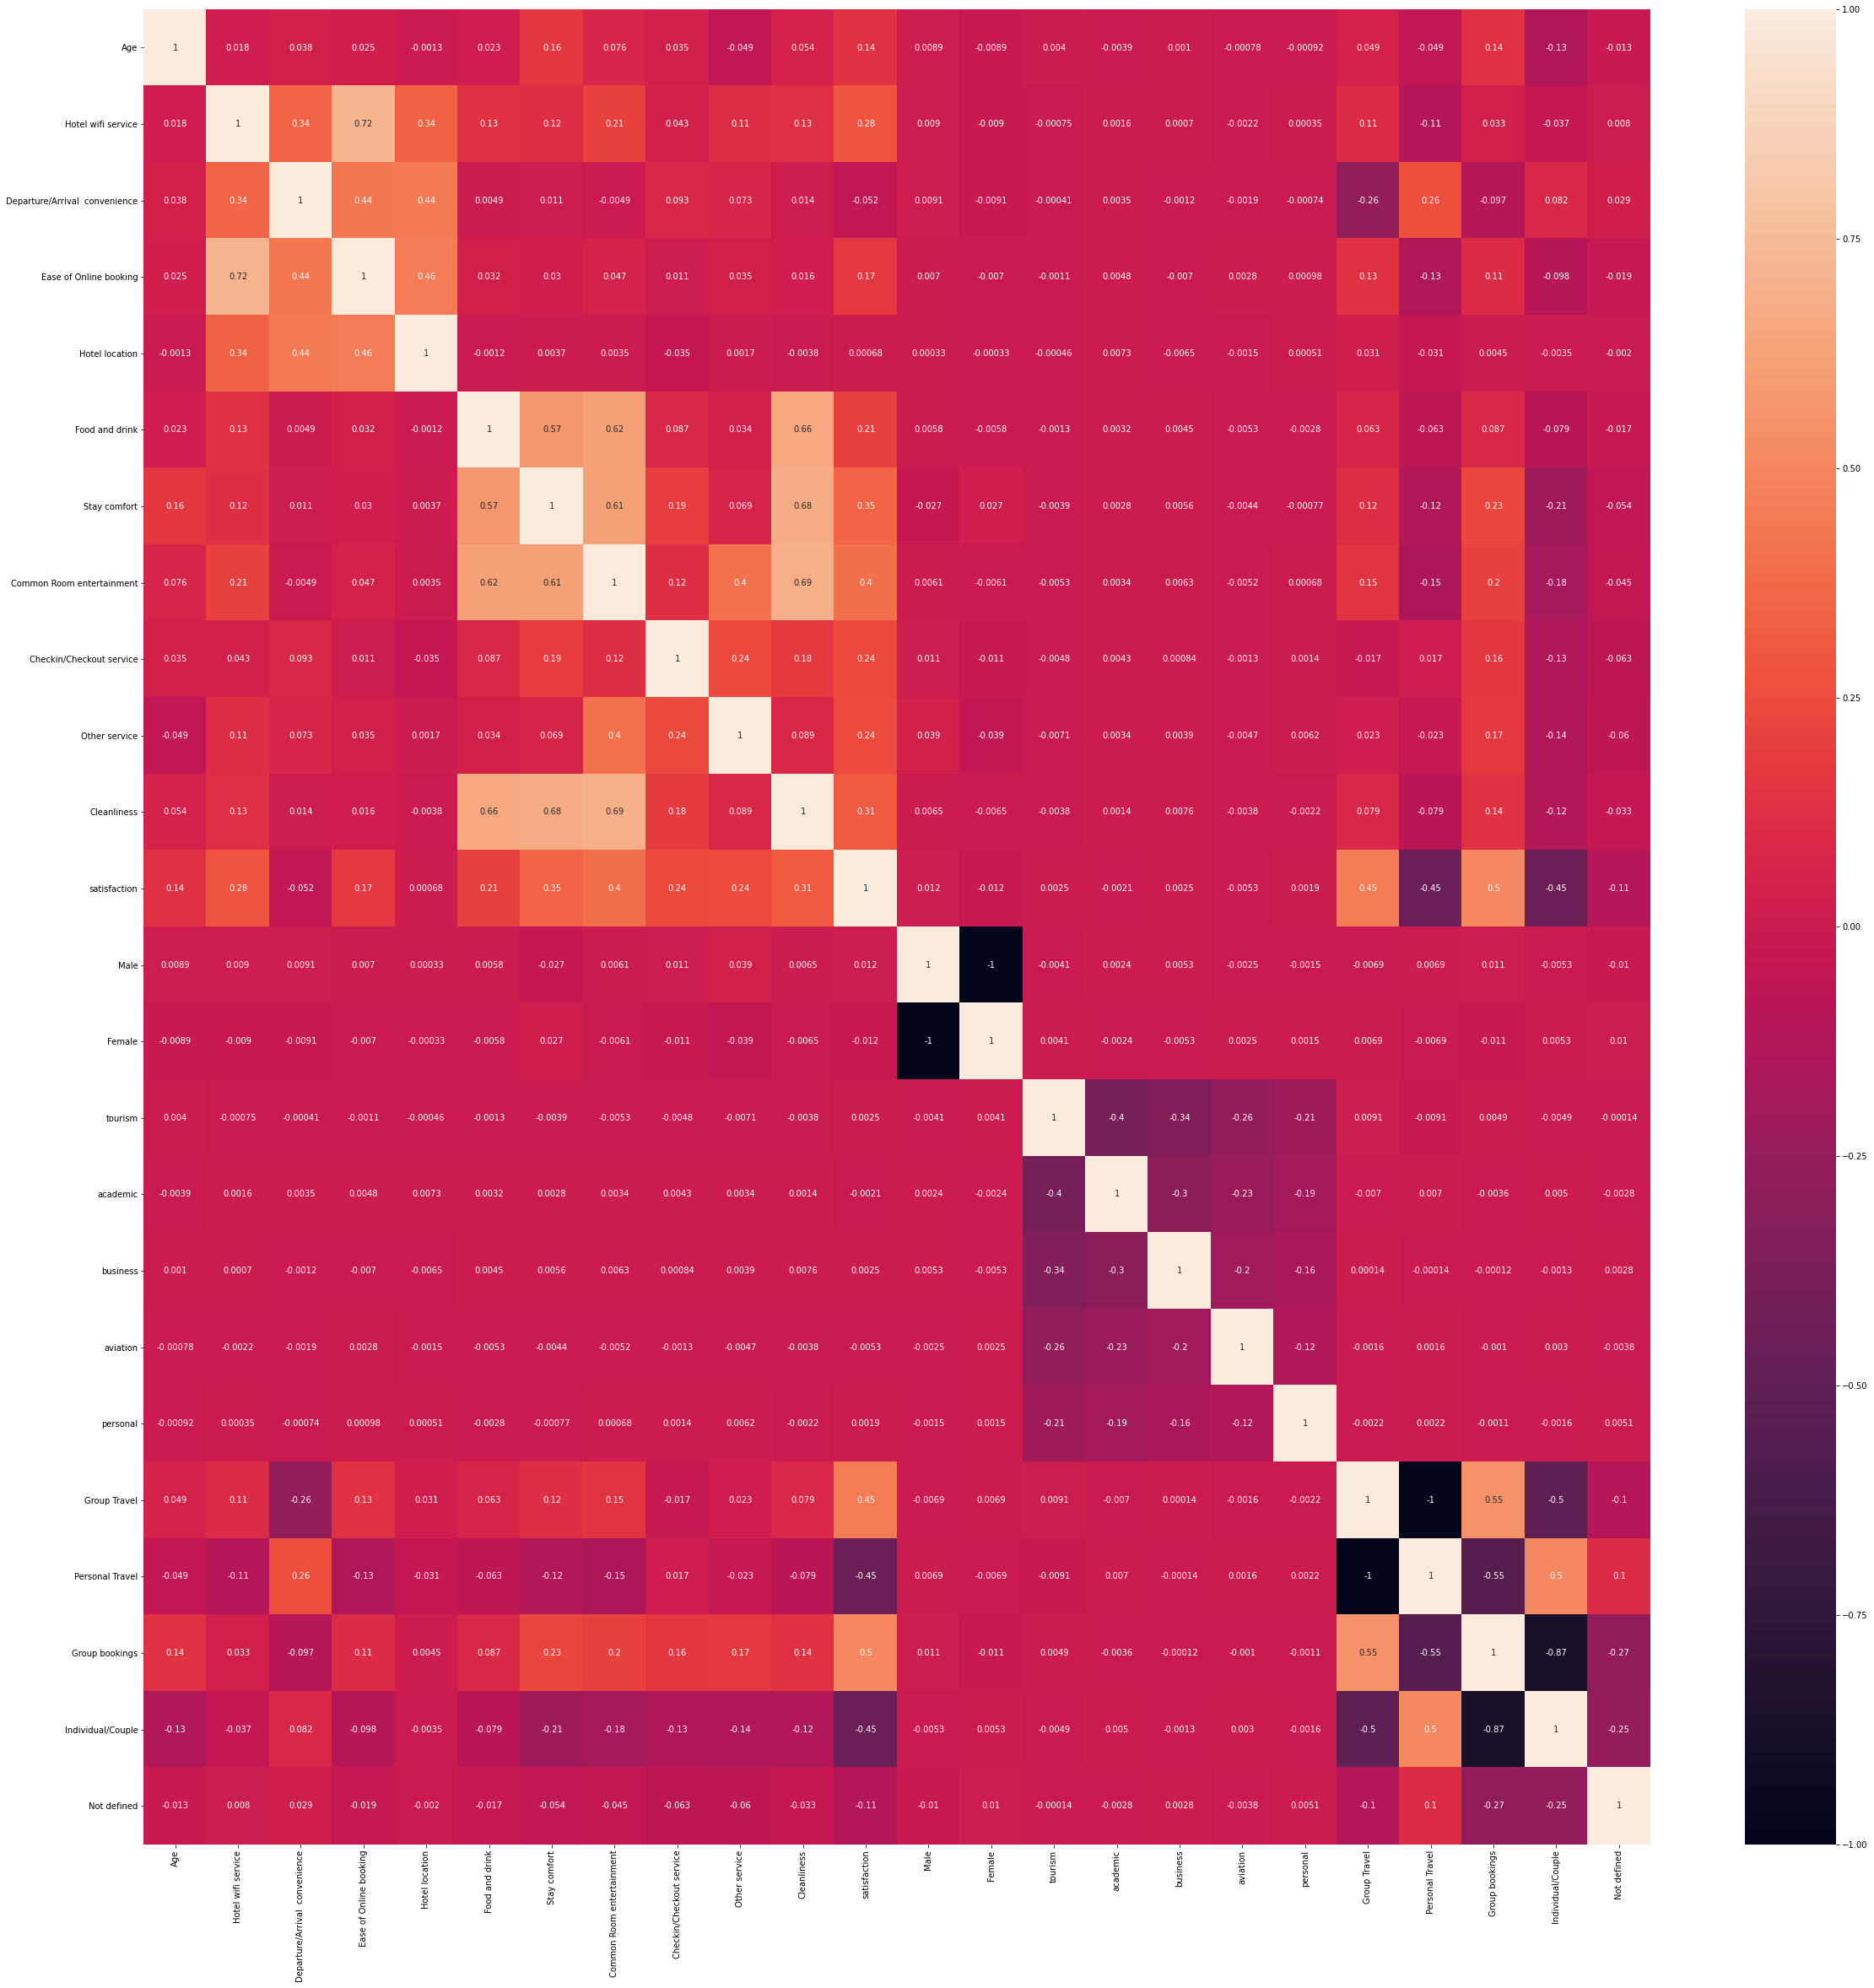

In [ ]:
# Correlation

plt.figure(figsize=(40, 40))
sns.heatmap(dataFrame.corr(), annot = True)
plt.show

**We can see that satisfaction depend on some features such as age, hotel customer service and some characteristics such as Group Travel, Personal Travel, Group bookings or Individual/Couple, while others are almost independent. Therefore, the hotel should improve some features and characteristics that have a major influence on satisfation**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4eb26bd690>,
      dtype=object)

<Figure size 2160x2160 with 0 Axes>

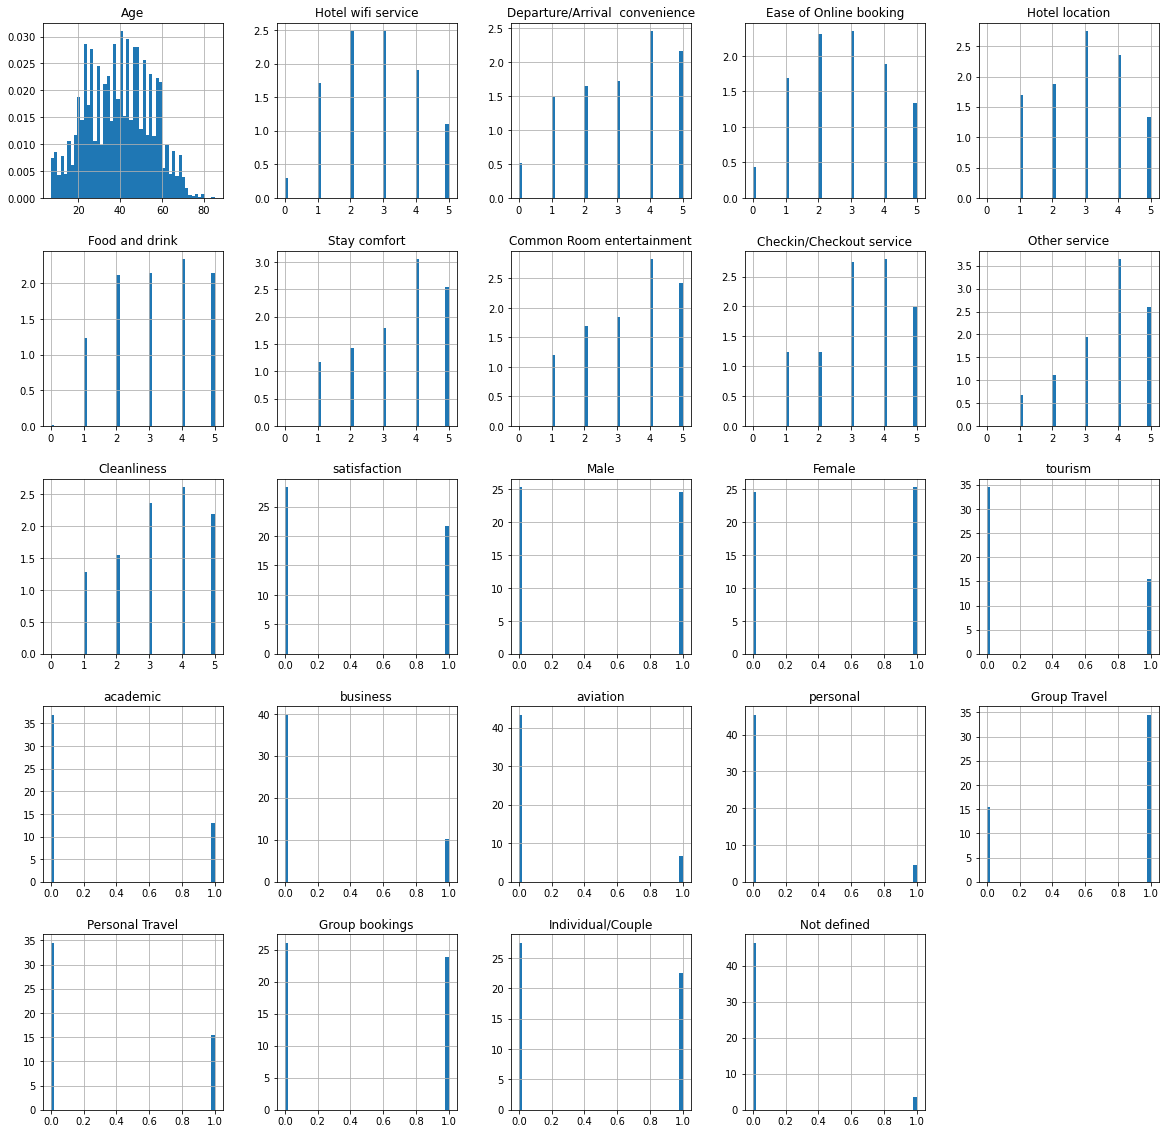

In [ ]:
# Histogram
plt.figure(figsize = (30, 30))
dataFrame.hist(bins = 50, figsize = (20, 20), density = 1)

<Figure size 2160x1440 with 0 Axes>

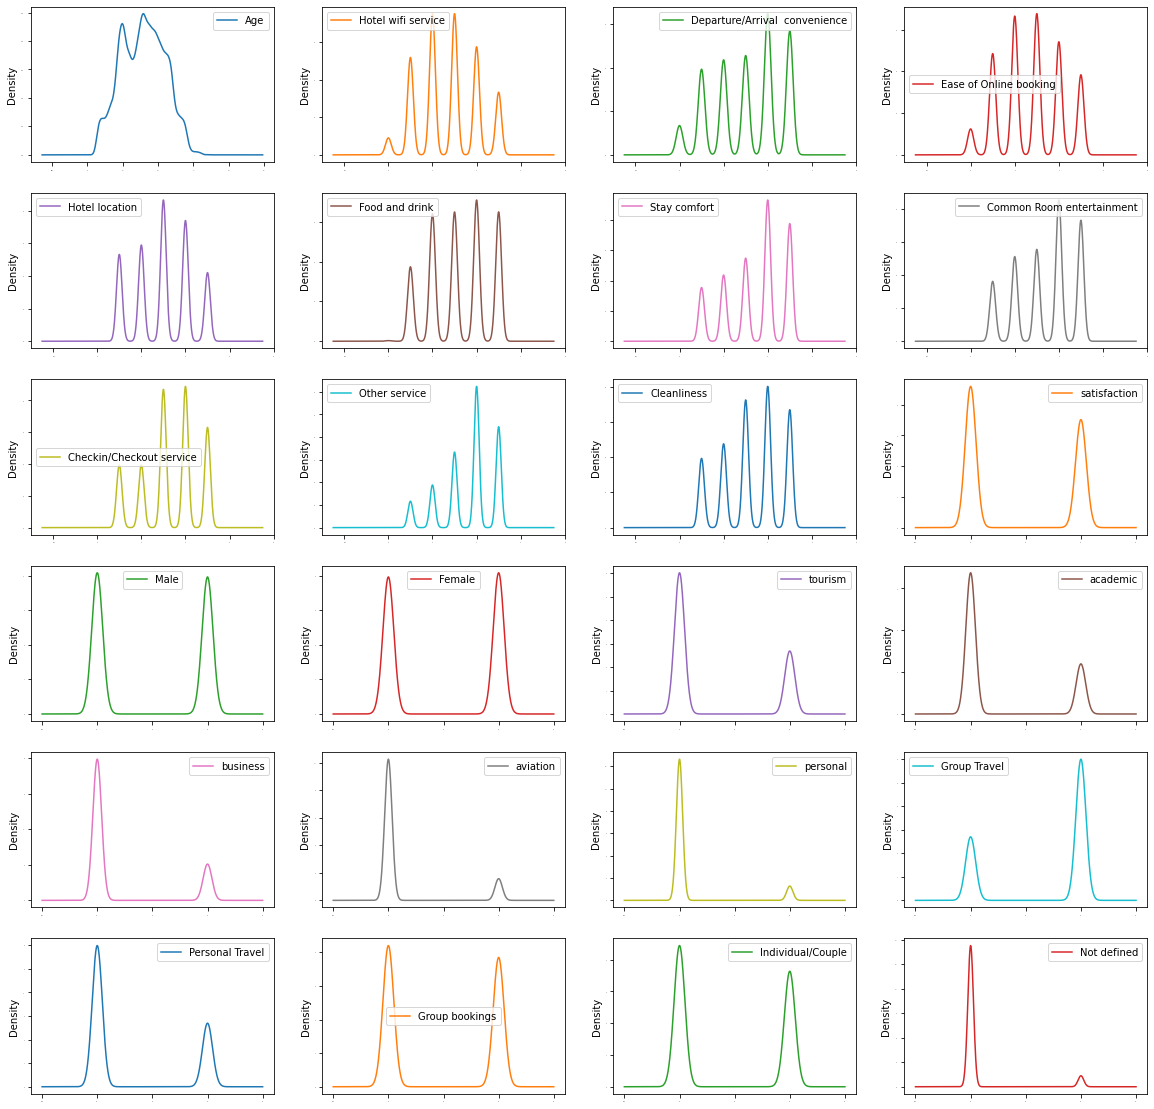

In [ ]:
# Density plot
plt.figure(figsize = (30, 20))
dataFrame.plot(kind= 'density', subplots=True, layout=(6,4), sharex = False, fontsize=1, figsize = (20, 20))
plt.show()

<Figure size 1800x1800 with 0 Axes>

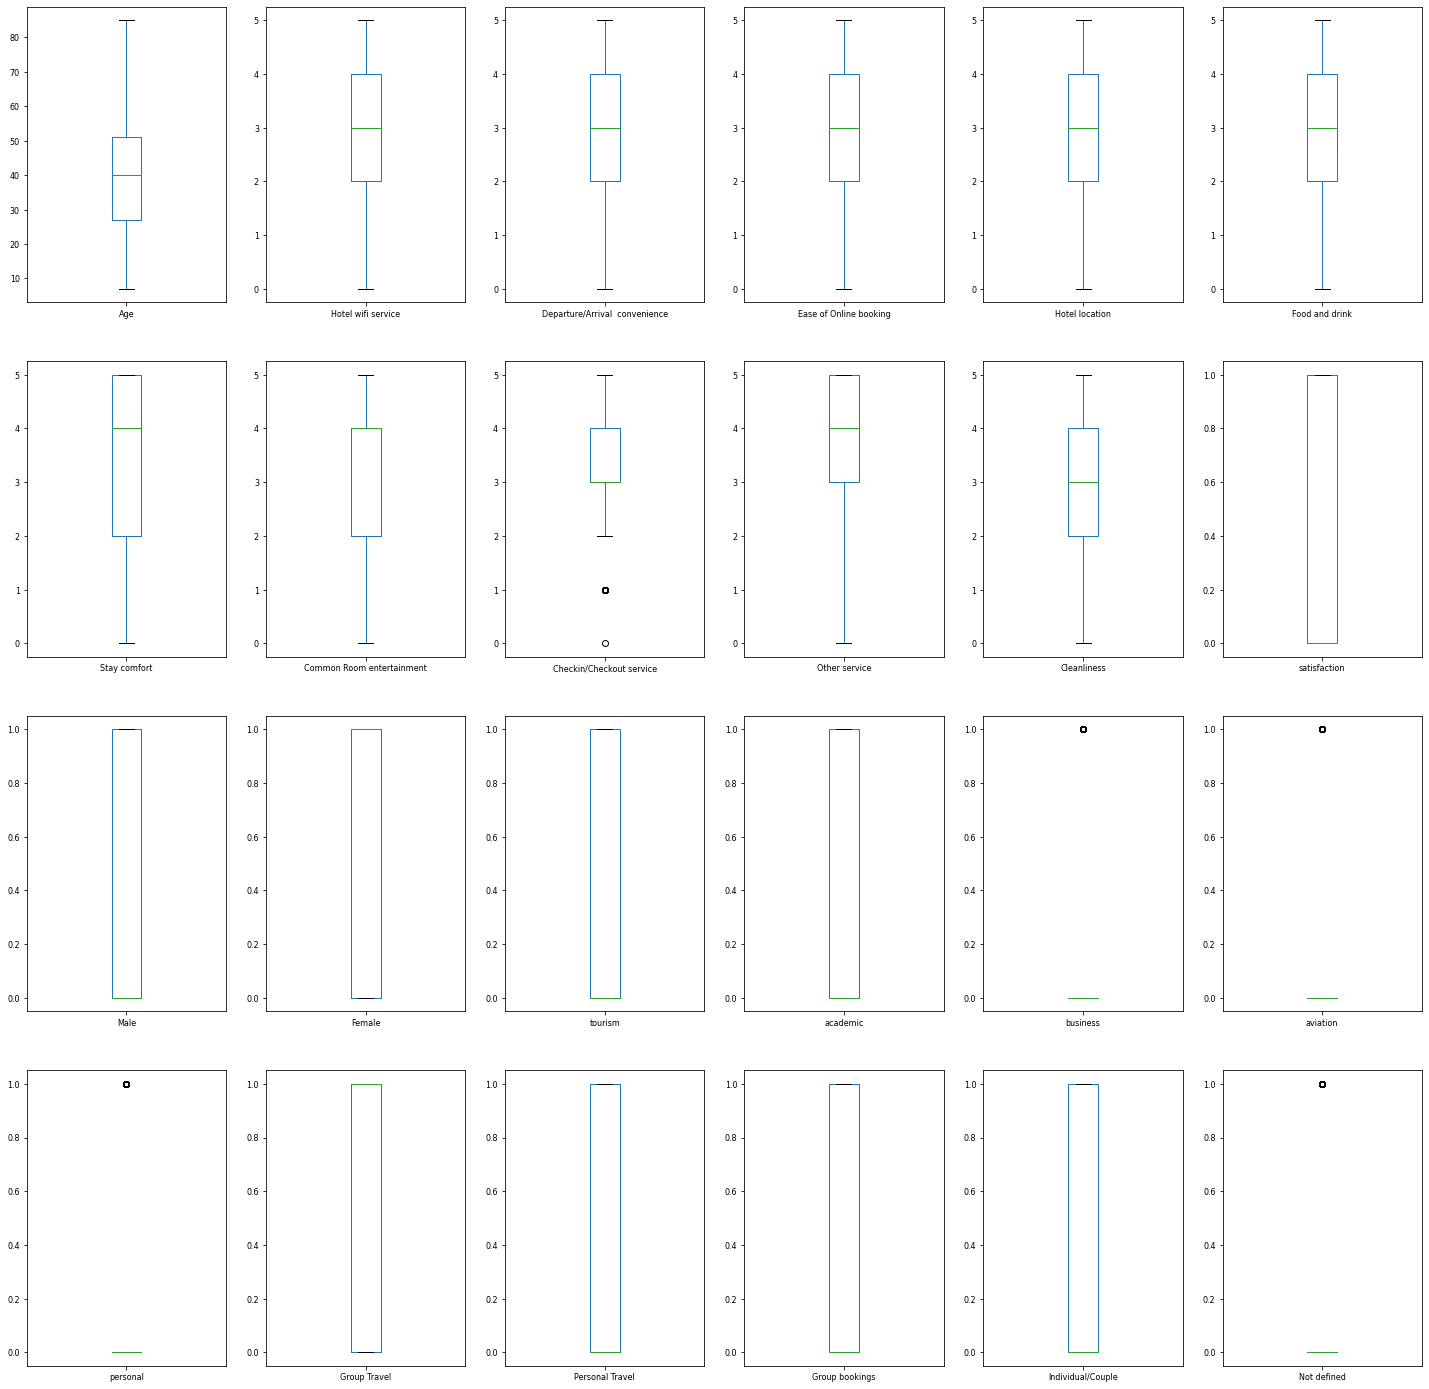

In [ ]:
# Box plot
plt.figure(figsize = (25, 25))
dataFrame.plot(kind='box', subplots=True, layout=(4, 6), sharex=False, sharey=False, fontsize=8, figsize = (25, 25))
plt.show()

**I will drop some columns where the correlation coefficient with satisfation is less than 0.1. I will compare 2 result, drop and not drop, after processing models**

In [ ]:
dataFrame_copy = copy.deepcopy(dataFrame)
list_col = dataFrame.columns
for s in list_col:
  if abs(dataFrame[s].corr(dataFrame['satisfaction'])) < 0.1:
    dataFrame = dataFrame.drop([s], axis = 1)
dataFrame

,Age,Hotel wifi service,Ease of Online booking,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction,Group Travel,Personal Travel,Group bookings,Individual/Couple,Not defined
0,48,3,3,5,5,5,4,5,5,0,1,0,1,0,0
1,35,2,2,3,4,5,3,5,5,1,1,0,1,0,0
2,41,4,4,5,5,3,4,3,5,1,1,0,1,0,0
3,50,2,2,4,5,5,3,5,4,1,1,0,1,0,0
4,49,3,3,4,4,3,3,3,5,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,28,4,4,3,3,3,4,4,3,0,0,1,0,0,1
103900,55,3,3,2,3,4,4,4,4,0,0,1,0,0,1
103901,42,2,2,3,3,3,4,4,3,0,0,1,0,0,1
103902,50,5,4,3,4,3,3,4,3,1,0,1,0,0,1


#**4. MODELLING GENERATION - DROPED DATAFRAME**

**4.1. PRE-PROCESSING**

In [ ]:
X = dataFrame.drop(["satisfaction"], axis = 1)
Y = dataFrame["satisfaction"]
Y.value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

In [ ]:
X

,Age,Hotel wifi service,Ease of Online booking,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,Group Travel,Personal Travel,Group bookings,Individual/Couple,Not defined
0,48,3,3,5,5,5,4,5,5,1,0,1,0,0
1,35,2,2,3,4,5,3,5,5,1,0,1,0,0
2,41,4,4,5,5,3,4,3,5,1,0,1,0,0
3,50,2,2,4,5,5,3,5,4,1,0,1,0,0
4,49,3,3,4,4,3,3,3,5,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,28,4,4,3,3,3,4,4,3,0,1,0,0,1
103900,55,3,3,2,3,4,4,4,4,0,1,0,0,1
103901,42,2,2,3,3,3,4,4,3,0,1,0,0,1
103902,50,5,4,3,4,3,3,4,3,0,1,0,0,1


In [ ]:
Y

0         0
1         1
2         1
3         1
4         1
         ..
103899    0
103900    0
103901    0
103902    1
103903    0
Name: satisfaction, Length: 103904, dtype: int64

In [ ]:
# Divide dataFrame into 2 datasets: train and validation
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape, X_validation.shape

((83123, 14), (20781, 14))

**4.2. PROCESSING**

In [ ]:
# declare variable
seed = 7
scoring = 'accuracy'

In [ ]:
models = []
models.append(('DTC', DecisionTreeClassifier()))
models.append(('LGR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('NB', GaussianNB()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SVM', SVC()))

In [ ]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
  cv_results = cross_val_score(model, X_train, Y_train, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

DTC: 0.912563 (0.002046)
LGR: 0.839671 (0.002883)
NB: 0.810726 (0.001617)
LDA: 0.835461 (0.002259)
SVM: 0.858559 (0.001638)


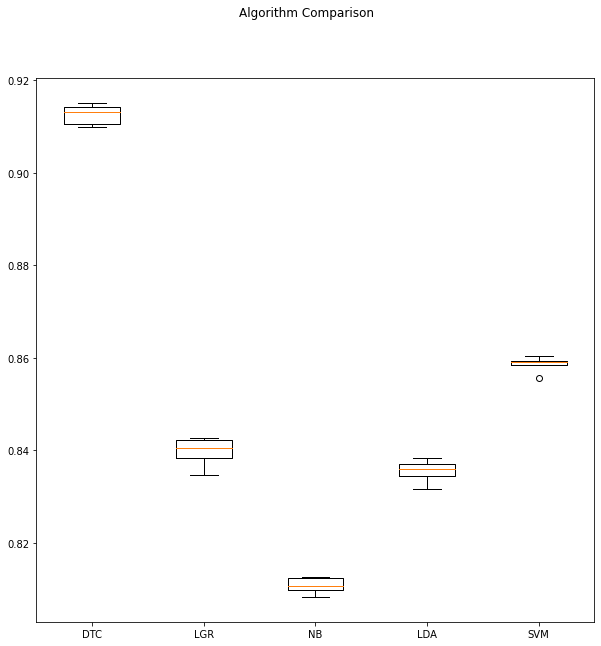

In [ ]:
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledDTC', Pipeline([('Scaler', StandardScaler()),('DTC', DecisionTreeClassifier())])))
pipelines.append(('ScaledLGR', Pipeline([('Scaler', StandardScaler()),('LGR', LogisticRegression(solver='liblinear', multi_class='ovr'))])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

results = []
names = []
for name, model in pipelines:
  cv_results = cross_val_score(model, X_train, Y_train, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledDTC: 0.912684 (0.002401)
ScaledLGR: 0.839671 (0.002827)
ScaledNB: 0.810726 (0.001617)
ScaledLDA: 0.835461 (0.002259)
ScaledSVM: 0.924329 (0.000769)


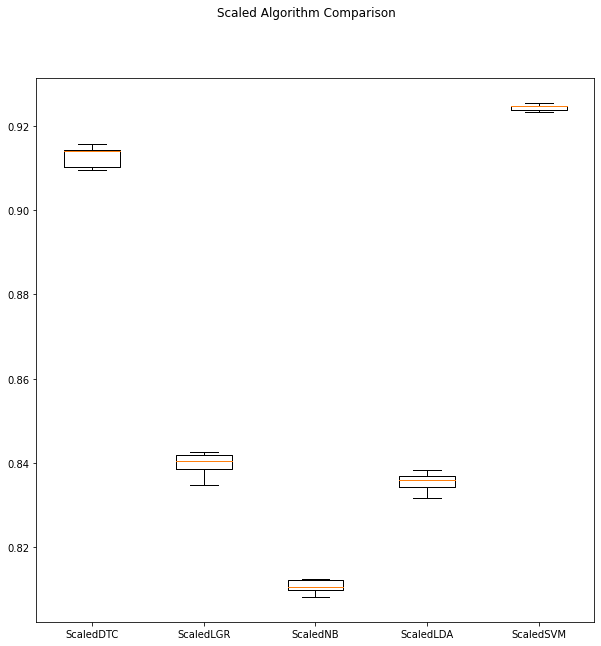

In [ ]:
# Compare Algorithms
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
# ensembles
ensembles = []
# boosting
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])))
# bagging
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',RandomForestClassifier())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',ExtraTreesClassifier())])))
results = []
names = []
for name, model in ensembles:
  cv_results = cross_val_score(model, X_train, Y_train, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledAB: 0.895143 (0.000587)
ScaledGBM: 0.919421 (0.000948)
ScaledRF: 0.930958 (0.001685)
ScaledET: 0.925580 (0.001570)


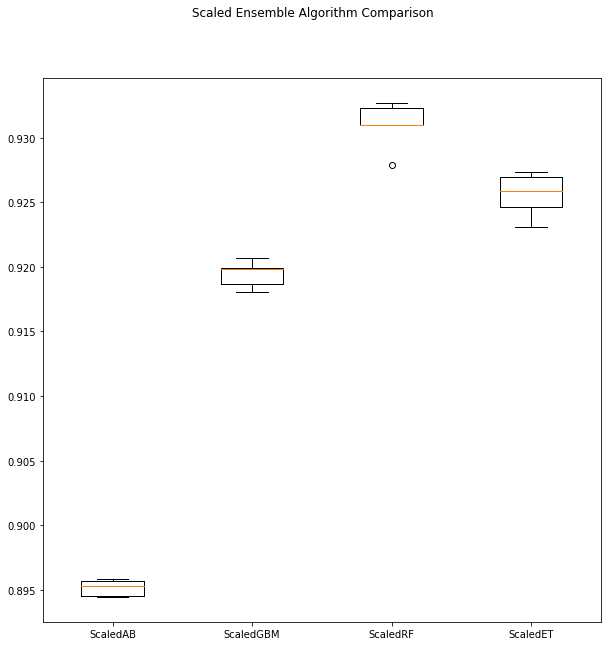

In [ ]:
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
# Scaled RandomForestClassifier
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([100,300,500,700,900]))
model = RandomForestClassifier(random_state=42)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.931343 using {'n_estimators': 500}
0.930862 (0.002003) with: {'n_estimators': 100}
0.931054 (0.002167) with: {'n_estimators': 300}
0.931343 (0.002128) with: {'n_estimators': 500}
0.931198 (0.002022) with: {'n_estimators': 700}
0.931162 (0.001910) with: {'n_estimators': 900}


In [ ]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = RandomForestClassifier(random_state=seed, n_estimators=500)
model.fit(rescaledX, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [ ]:
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print("Classification_report")
print(classification_report(Y_validation, predictions))
print("Confusion matrix: ")
print(confusion_matrix(Y_validation, predictions))

Classification_report
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     11760
           1       0.93      0.91      0.92      9021

    accuracy                           0.93     20781
   macro avg       0.93      0.93      0.93     20781
weighted avg       0.93      0.93      0.93     20781

Confusion matrix: 
[[11093   667]
 [  782  8239]]


#**5. MODELLING GENERATION - NOT DROP DATAFRAME**

**4.1. PRE-PROCESSING**

In [ ]:
X = dataFrame_copy.drop(["satisfaction"], axis = 1)
Y = dataFrame_copy["satisfaction"]
Y.value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

In [ ]:
X

,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,Male,Female,tourism,academic,business,aviation,personal,Group Travel,Personal Travel,Group bookings,Individual/Couple,Not defined
0,48,3,3,3,3,5,5,5,4,5,5,1,0,1,0,0,0,0,1,0,1,0,0
1,35,2,2,2,2,3,4,5,3,5,5,0,1,1,0,0,0,0,1,0,1,0,0
2,41,4,4,4,4,5,5,3,4,3,5,1,0,1,0,0,0,0,1,0,1,0,0
3,50,2,2,2,2,4,5,5,3,5,4,1,0,1,0,0,0,0,1,0,1,0,0
4,49,3,3,3,3,4,4,3,3,3,5,0,1,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,28,4,2,4,4,3,3,3,4,4,3,0,1,0,0,0,0,1,0,1,0,0,1
103900,55,3,4,3,4,2,3,4,4,4,4,0,1,0,0,0,1,0,0,1,0,0,1
103901,42,2,5,2,1,3,3,3,4,4,3,1,0,0,1,0,0,0,0,1,0,0,1
103902,50,5,4,4,1,3,4,3,3,4,3,1,0,0,0,1,0,0,0,1,0,0,1


In [ ]:
Y

0         0
1         1
2         1
3         1
4         1
         ..
103899    0
103900    0
103901    0
103902    1
103903    0
Name: satisfaction, Length: 103904, dtype: int64

In [ ]:
# Divide dataFrame into 2 datasets: train and validation
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape, X_validation.shape

((83123, 23), (20781, 23))

**4.2. PROCESSING**

In [ ]:
# declare variable
seed = 7
scoring = 'accuracy'

In [ ]:
models = []
models.append(('DTC', DecisionTreeClassifier()))
models.append(('LGR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('NB', GaussianNB()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SVM', SVC()))

In [ ]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
  cv_results = cross_val_score(model, X_train, Y_train, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

DTC: 0.922861 (0.000951)
LGR: 0.842547 (0.001792)
NB: 0.810414 (0.001738)
LDA: 0.837265 (0.001516)
SVM: 0.861831 (0.001479)


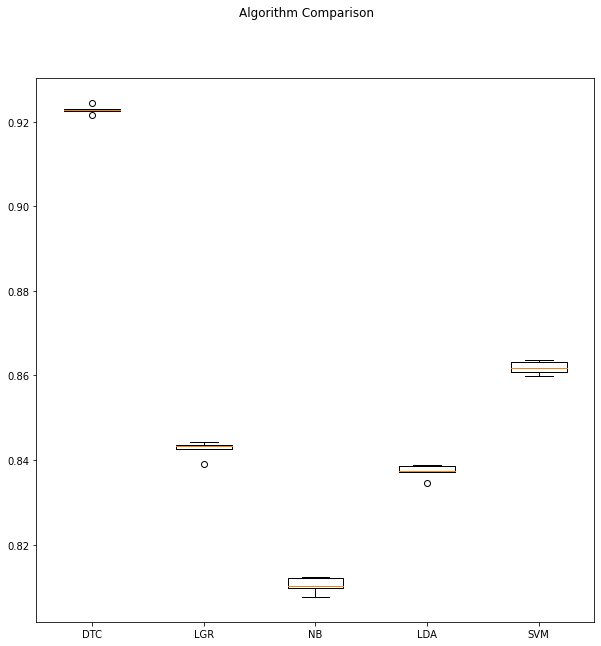

In [ ]:
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledDTC', Pipeline([('Scaler', StandardScaler()),('DTC', DecisionTreeClassifier())])))
pipelines.append(('ScaledLGR', Pipeline([('Scaler', StandardScaler()),('LGR', LogisticRegression(solver='liblinear', multi_class='ovr'))])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

results = []
names = []
for name, model in pipelines:
  cv_results = cross_val_score(model, X_train, Y_train, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledDTC: 0.922272 (0.001479)
ScaledLGR: 0.842559 (0.001779)
ScaledNB: 0.810414 (0.001738)
ScaledLDA: 0.837265 (0.001516)
ScaledSVM: 0.928840 (0.000723)


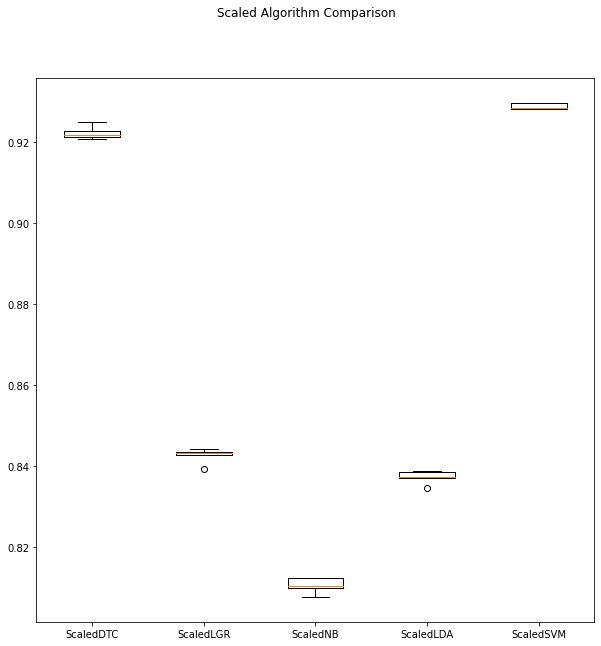

In [ ]:
# Compare Algorithms
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
# ensembles
ensembles = []
# boosting
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])))
# bagging
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',RandomForestClassifier())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',ExtraTreesClassifier())])))
results = []
names = []
for name, model in ensembles:
  cv_results = cross_val_score(model, X_train, Y_train, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledAB: 0.900377 (0.000474)
ScaledGBM: 0.926506 (0.001196)
ScaledRF: 0.944973 (0.000713)
ScaledET: 0.938934 (0.001574)


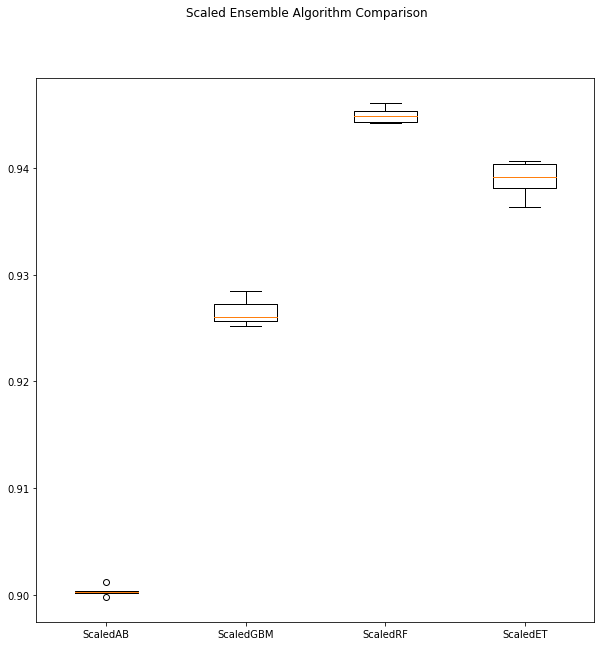

In [ ]:
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
# Scaled RandomForestClassifier
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([100,300,500,700,900]))
model = RandomForestClassifier(random_state=42)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.945599 using {'n_estimators': 500}
0.945178 (0.000995) with: {'n_estimators': 100}
0.945442 (0.000803) with: {'n_estimators': 300}
0.945599 (0.000736) with: {'n_estimators': 500}
0.945599 (0.000949) with: {'n_estimators': 700}
0.945466 (0.000812) with: {'n_estimators': 900}


In [ ]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = RandomForestClassifier(random_state=seed, n_estimators=500)
model.fit(rescaledX, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [ ]:
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print("Classification_report")
print(classification_report(Y_validation, predictions))
print("Confusion matrix: ")
print(confusion_matrix(Y_validation, predictions))

#print(mean_squared_error(Y_validation, predictions))

Classification_report
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11760
           1       0.95      0.92      0.94      9021

    accuracy                           0.95     20781
   macro avg       0.95      0.94      0.94     20781
weighted avg       0.95      0.95      0.95     20781

Confusion matrix: 
[[11303   457]
 [  681  8340]]


**GOOD RESULT!!!**

#**6. CONCLUSION**

- Through this project, we can know the main factors affecting satisfaction, thereby making reasonable adjustments to increase business efficiency.
- Sometimes retaining some features with a low correlation coefficient compared to the output results in better model results.